# Finance Data Project

This project focuses on exploratory data analysis of major banks' stock price throughout the financial crisis all the way to early 2016.

For more details on financial crisis in 2016: https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308

This is a data capstone project I've done in the course - **Python Data Science and Machine Learning Bootcamp** by Pierian Data.

***This project is just meant to practice my python skills, it is not meant to be a robust financial analysis or be taken as financial advice.**



In [66]:
# importing libraries
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1 - Getting data & Restructuring

In [13]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [15]:
# Bank of America
BAC = data.DataReader('BAC', 'yahoo',start,end)
# CitiGroup
C = data.DataReader('C', 'yahoo',start,end)
# Goldman Sachs
GS = data.DataReader('GS', 'yahoo',start,end)
# JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo',start,end)
# Morgan Stanley
MS = data.DataReader('MS', 'yahoo',start,end)
# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo',start,end)

In [16]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [18]:
# Creating data frame

bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1)
bank_stocks.head(3)

,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,...,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.298687,493.799988,481.100006,490.000000,492.899994,...,57.169998,58.310001,5377000.0,37.429329,31.975,31.195000,31.600000,31.900000,11016400.0,20.904305
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.923801,491.000000,483.500000,488.600006,483.799988,...,58.700001,58.349998,7977800.0,37.455013,31.820,31.365000,31.799999,31.530001,10870000.0,20.661839
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.968796,487.799988,484.000000,484.399994,486.200012,...,58.549999,58.509998,5778000.0,37.557716,31.555,31.309999,31.500000,31.495001,10158000.0,20.638908


In [21]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.head(3)

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.298687   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.923801   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.968796   

                     C                                        ...      \
                  High         Low        Open       Close    ...       
Date                                                          ...       
2006-01-03  493.799988  481.100006  490.000000  492.899994    ...       
2006-01-04  491.000000  483.500000  488.600006  483.799988    ...       
2006-01-05  487.799988  484.000000  484.399994  486.200012    ...       

                   MS                                      WFC             \
                 Open      Close     Volume  Adj Close    High        Low   
Date                                                                        
2006-01-03  57.169998  58.310001  5377000.0  37.429329  31.975  31.195000   
2006-01-04  58.700001  58.349998  7977800.0  37.455013  31.820  31.365000   
2006-01-05  58.549999  58.509998  5778000.0  37.557716  31.555  31.309999   

                                                         
                 Open      Close      Volume  Adj Close  
Date                                                     
2006-01-03  31.600000  31.900000  11016400.0  20.904305  
2006-01-04  31.799999  31.530001  10870000.0  20.661839  
2006-01-05  31.500000  31.495001  10158000.0  20.638908  

[3 rows x 36 columns]

In [23]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head(2)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988   

Bank Ticker    ...             MS                                      WFC  \
Stock Info     ...           Open      Close     Volume  Adj Close    High   
Date           ...                                                           
2006-01-03     ...      57.169998  58.310001  5377000.0  37.429329  31.975   
2006-01-04     ...      58.700001  58.349998  7977800.0  37.455013  31.820   

Bank Ticker                                                       
Stock Info      Low       Open      Close      Volume  Adj Close  
Date                                                              
2006-01-03   31.195  31.600000  31.900000  11016400.0  20.904305  
2006-01-04   31.365  31.799999  31.530001  10870000.0  20.661839  

[2 rows x 36 columns]

# Part 2 - Exploratory Data Analysis

In [36]:
# Let's see the max closing price

round(bank_stocks.xs(key='Close',axis=1,level='Stock Info').max(),1)

Bank Ticker
BAC     54.9
C      564.1
GS     247.9
JPM     70.1
MS      89.3
WFC     58.5
dtype: float64

In [37]:
# another way to do it with for loop

for tick in tickers:
    print (tick, round(bank_stocks[tick]['Close'].max(),1))

BAC 54.9
C 564.1
GS 247.9
JPM 70.1
MS 89.3
WFC 58.5


In [38]:
# How about the return?

Returns = pd.DataFrame()

for tick in tickers:
    Returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [39]:
Returns.head(3)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110


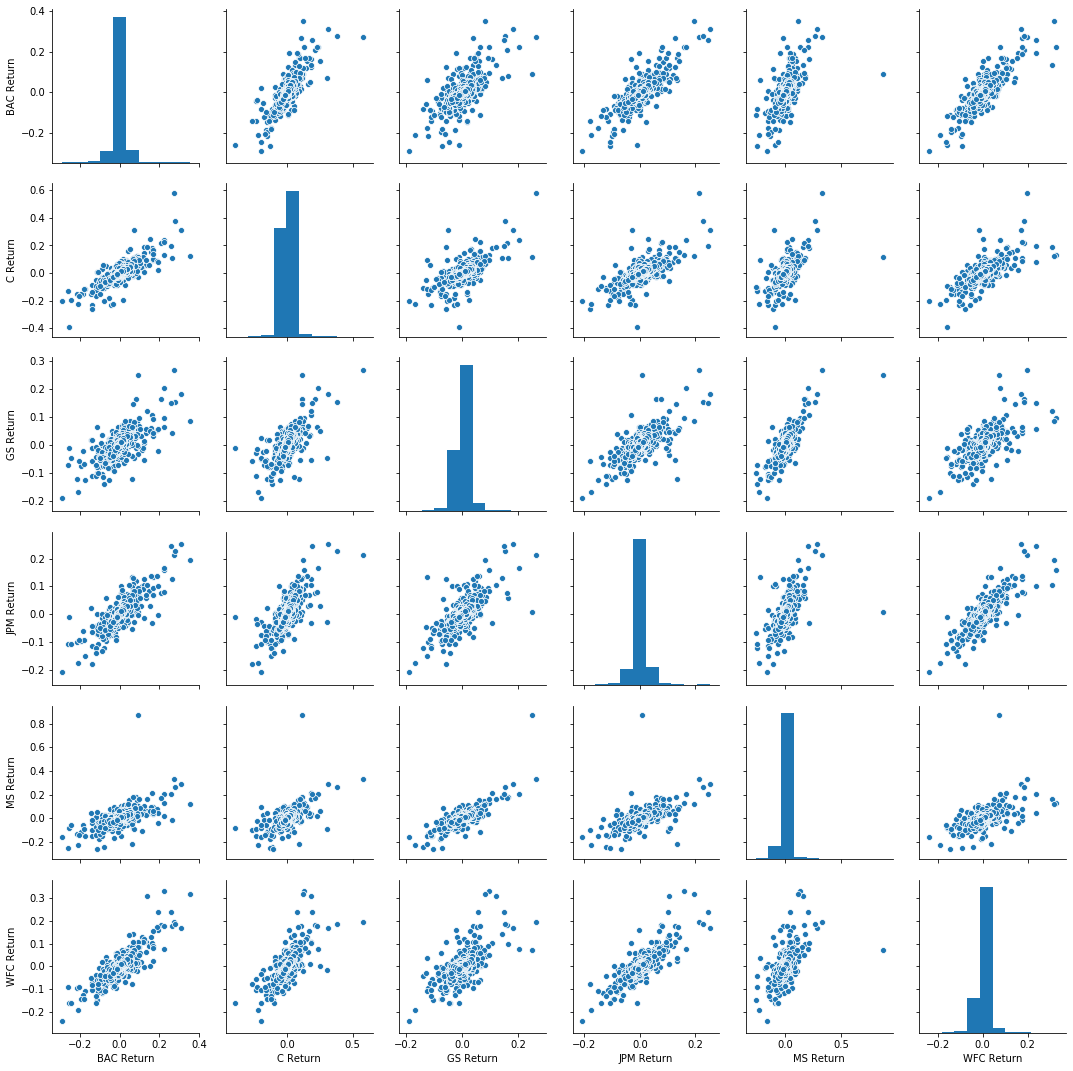

In [40]:
# Using pairplot to visualize the data and to see any unusual

import seaborn as sns
sns.pairplot(data=Returns[1:])

In [49]:
# Worst drop in a single trading day
# Happened in Aug 2018 - Feb 2019 (Phase 1 of bear cycle)

Returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [50]:
# Best gain in a single trading day
# As usual, best gain (single day) tends to happen before a crisis (Phase 3 of a bull cycle)

Returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [51]:
Returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [52]:
# Citigroup seems to the riskiest, and JP Morgan the safest

Returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

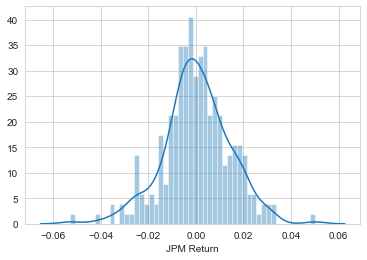

In [57]:
# JPM Return after recovery

sns.distplot(Returns['JPM Return'].loc['2015-01-01':'2015-12-31'],bins=50)
sns.set_style('whitegrid')

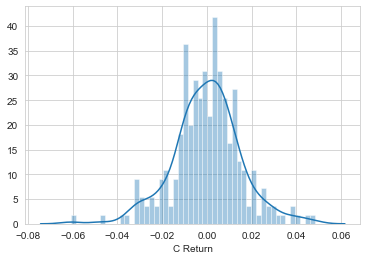

In [58]:
# C Return after recovery
sns.distplot(Returns['C Return'].loc['2015-01-01':'2015-12-31'],bins=50)
sns.set_style('whitegrid')

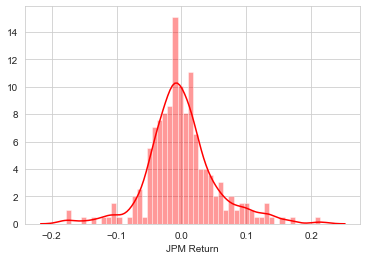

In [61]:
# JPM return during crisis

sns.distplot(Returns['JPM Return'].loc['2008-01-01':'2008-12-31'],color='red',bins=50)

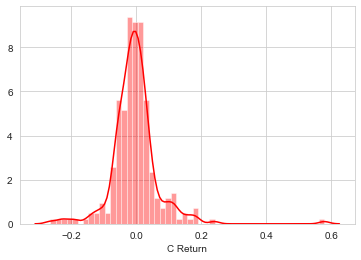

In [62]:

# C return during crisis
sns.distplot(Returns['C Return'].loc['2008-01-01':'2008-12-31'],color='red',bins=50)

# Part 3 - Visualization with more indicators

In [124]:
import plotly
import cufflinks as cf
cf.go_offline()

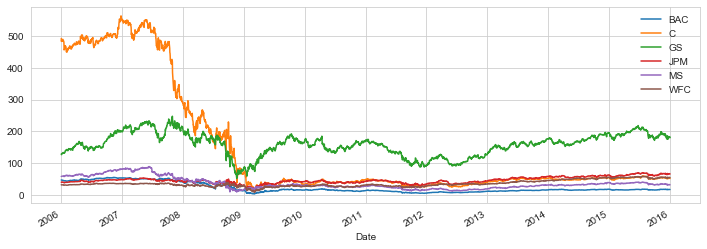

In [67]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

plt.legend(loc=1,frameon=False)

In [80]:
# Plotly with interactions for easier referencing

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot(kind='line',showline=True,linecolor='Black',
                                                            title='Bank Stocks Close Price')

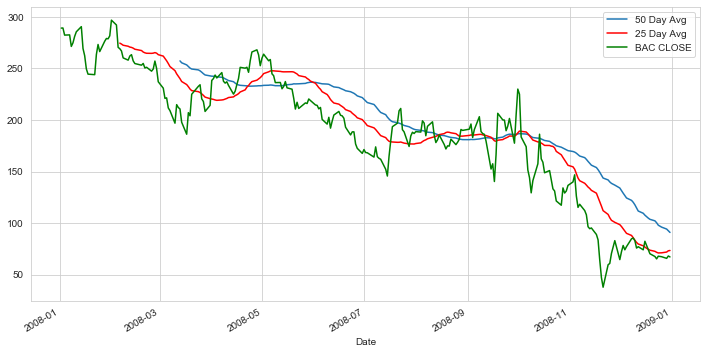

In [83]:
# C with moving averages during crisis
# MA 50 was always downward developing, investors should not consider investing in $C in this period, if not shorting

plt.figure(figsize=(12,6))
C['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=50).mean().plot(label='50 Day Avg')
C['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=25).mean().plot(label='25 Day Avg',color='red')
C['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE',color='green')
plt.legend()

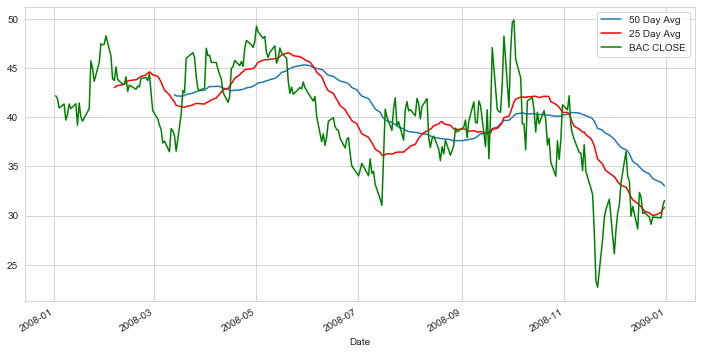

In [82]:
# JPM with moving averages during crisis
# MA 25 was crossing MA 50 for many times but downward progressing, a steady recessing stock druing this period

plt.figure(figsize=(12,6))
JPM['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=50).mean().plot(label='50 Day Avg')
JPM['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=25).mean().plot(label='25 Day Avg',color='red')
JPM['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE',color='green')
plt.legend()

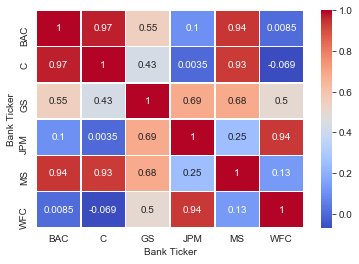

In [100]:
#Exploring correlation between the stocks Close Price with heatmap

sns.heatmap(bank_stocks.xs('Close',axis=1,level='Stock Info').
            corr(),annot=True,cmap='coolwarm',linewidths=.5)

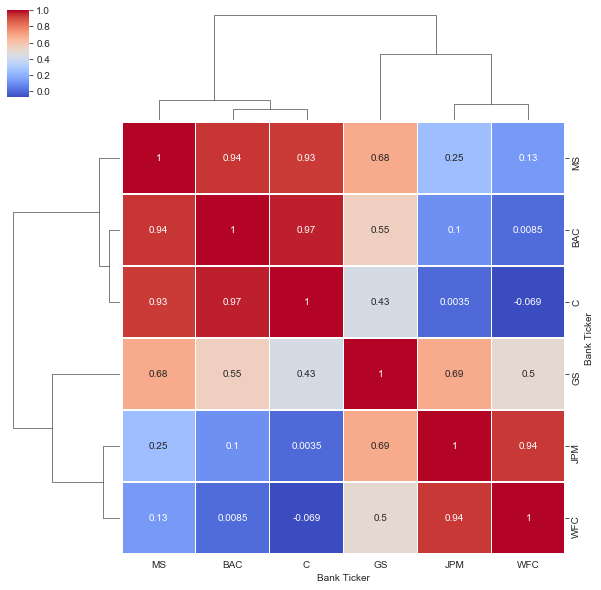

In [101]:
# Clustering the correlations together with clustermap

sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').
               corr(),annot=True,cmap='coolwarm',linewidth=0.5)

In [123]:
# Plotly with interactions for easier referencing

close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='Reds')

# Part 4 - Some Technical Analysis Plots
**This is not available on GitHub

In [134]:
# Candle Stick
JPM[['High','Low','Open','Close']].loc['2015-01-01':'2016-01-02'].iplot(kind='candle')

In [139]:
# Moving Average

MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',period=[50]
                                                   ,color=['orange','blue'])

In [140]:
# Bollinger Bands
JPM['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Thanks for your review

In this project, I used different data manipulation and visualization skills. Indeed, stock market is also a topic I am really interested in.

As you may know, we have just experienced one of the largest drawdown in the stock market in Q1 2020. It is worth analyzing how a particular sector is performing. So I will be doing another project with similar format in the near future.